# Boat Sales Analysis

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Descriptive analysis
#### 3. Data Cleaning
#### 4. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Vis libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Ensure charts are displayed in notebook
%matplotlib inline

In [3]:
# Import data (as dataframe)
df = pd.read_csv(r'/Users/mentaykoshzhanova/Desktop/boat project/02 Data/Original Data/boat_data.csv', index_col = False)

In [4]:
# Path to the original data
path= r'/Users/mentaykoshzhanova/Desktop/boat project'
path

'/Users/mentaykoshzhanova/Desktop/boat project'

In [5]:
# Using path join
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'boat_data.csv'), index_col = False)

### 2. Descriptive analysis

In [6]:
df.shape

(9888, 10)

In [7]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [8]:
df.dtypes

Price                           object
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
dtype: object

In [9]:
df.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


## 3. Data Cleaning

In [13]:
#Checking for missing values
df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

In [14]:
count = df['Year Built'].value_counts()[0]
print(f"The 0 built year number is: {count}")

The 0 built year number is: 551


In [15]:
# looking closer at price column
df['Price'].describe()

count          9888
unique         3182
top       EUR 65000
freq             77
Name: Price, dtype: object

In [16]:
# splitting currency from price
df[['Currency', 'Price']]= df['Price'].str.extract('(\w+)\s(\w+)', expand=True)
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR


In [17]:
# creating a new column Price_in_usd with converted prices from initial currency
def price_in_dollars(Price, Currency):
    if Currency == 'EUR':
        return int (Price) * 1.07
    elif Currency == 'CHF':
        return int(Price) * 1.11
    elif Currency == 'DKK':
        return int(Price) * 0.14
    elif Currency == 'Â£':
        return int(Price) * 1.24
df['Price_in_usd'] = df.apply(lambda x: price_in_dollars(x.Price, x.Currency), axis=1)

In [18]:
# looking closer at location column
df['Location'].describe()

count                               9852
unique                              2995
top       Netherlands Â» In verkoophaven
freq                                 309
Name: Location, dtype: object

In [19]:
# splitting location column to have a separate column with country names
df[['Country','City']]= df['Location'].str.split('Â»', 1, expand=True)



/var/folders/yz/w55xm0757_xf7s97jpfxx22h0000gn/T/ipykernel_71918/1009269803.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Country','City']]= df['Location'].str.split('Â»', 1, expand=True)


In [20]:
# checking for duplicates // no duplicates
df_dups= df[df.duplicated()]
df_dups.shape

(0, 14)

In [21]:
# Checking mixed-data type columns
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

Price
Manufacturer
Type
Material
Location
Currency
Country
City


#### Will leave those mixed-data type columns as it is for now

In [22]:
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Number of views last 7 days',
       'Currency', 'Price_in_usd', 'Country', 'City'],
      dtype='object')

In [23]:
# Renaming type to condition for readability
df.rename(columns = {'Type':'Condition'}, inplace = True) 

In [24]:
#dropping unnecessary columns
df.drop(['Price','Location','Currency','City'], axis=1, inplace=True)

In [25]:
df.head()

,Boat Type,Manufacturer,Condition,Year Built,Length,Width,Material,Number of views last 7 days,Price_in_usd,Country
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,3704.07,Switzerland
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3734.30,Germany
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,4184.70,Switzerland
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,3626.00,Denmark
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3636.93,Germany


In [27]:
# looking closer at condition column
df['Condition'].value_counts(dropna = False)

Used boat,Diesel                4140
Used boat,Unleaded              1686
Used boat                       1462
new boat from stock,Unleaded    1107
new boat from stock              665
new boat from stock,Diesel       291
new boat on order,Unleaded       150
Display Model,Unleaded            75
new boat on order                 61
new boat on order,Diesel          61
Diesel                            57
Used boat,Electric                27
Unleaded                          22
Display Model,Diesel              19
new boat from stock,Electric      18
Display Model                     18
Used boat,Gas                     10
NaN                                6
Display Model,Electric             6
new boat from stock,Gas            2
new boat from stock,Hybrid         1
Used boat,Hybrid                   1
Display Model,Gas                  1
Electric                           1
Used boat,Propane                  1
Name: Condition, dtype: int64

## 4. Exploring Relationships

### task2 - pick out variables from your data set suitable for your exploratory visual analysis (price_in_usd, year built, length, width, number of views last 7 days columns were picked)

In [28]:
# creating a subset of vars that are suitable for exploratory visual analysis
df_sub = df[['Price_in_usd', 'Year Built', 'Length', 'Width', 'Number of views last 7 days']]
df_sub

,Price_in_usd,Year Built,Length,Width,Number of views last 7 days
0,3704.07,2017,4.00,1.90,226
1,3734.30,2020,4.00,1.50,75
2,4184.70,0,3.69,1.42,124
3,3626.00,2020,3.00,1.00,64
4,3636.93,2019,3.55,1.46,58
...,...,...,...,...,...
9883,5439.00,1987,6.30,2.44,1116
9884,4832.12,0,4.17,1.68,94
9885,4813.93,2020,4.40,1.80,354
9886,4601.00,2018,4.37,1.89,266


### task3 -create a correlation matrix heatmap (colored)

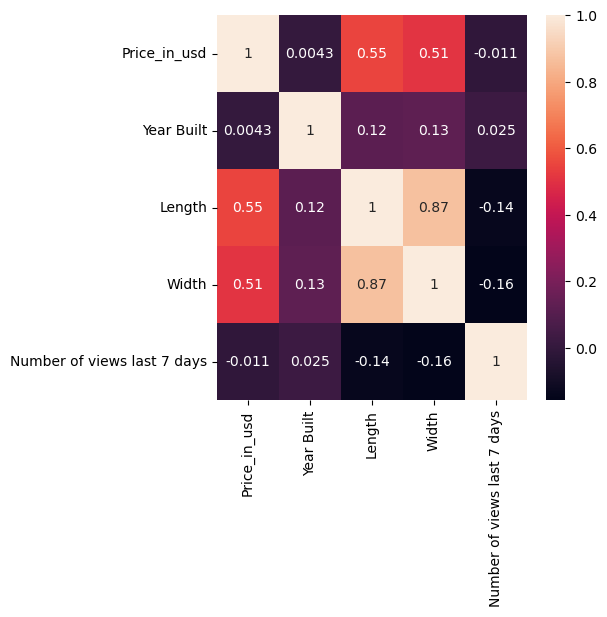

In [29]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(5,5))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

#### The correlation between columns are not strong as expected. The stronger correlation is between price and length and width of the boat, which makes sense. I was expecting price be depending on the year built as well, in this case it's in negative correlation. 

### task4 - Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships

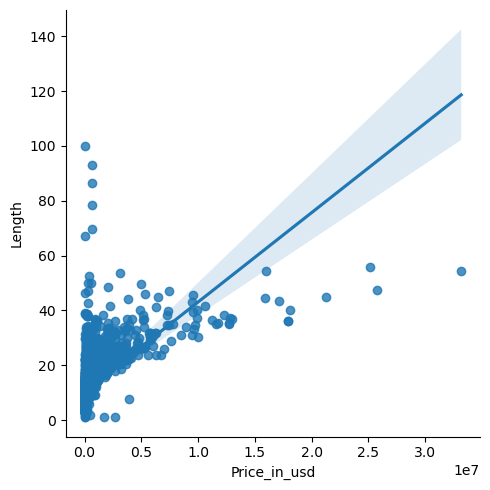

In [30]:
# Create a scatterplot for the "Price_in_usd" and "Length" columns in seaborn

sns.lmplot(x = 'Price_in_usd', y = 'Length', data = df)

#### Here we can see weak positive relationship, the trend line is going up but there are many points far away from this line. 

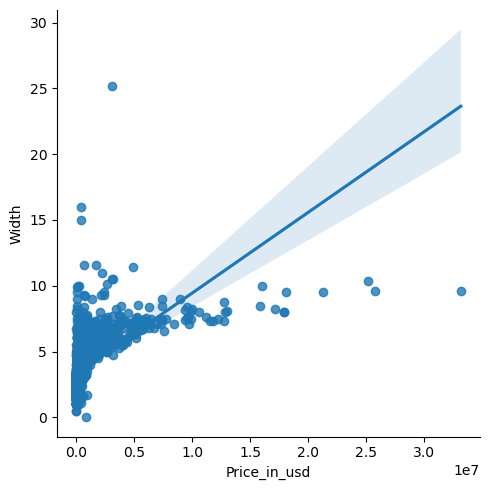

In [31]:
# Create a scatterplot for the "Price_in_usd" and "Width" columns in seaborn

sns.lmplot(x = 'Price_in_usd', y = 'Width', data = df)

#### This visualization also shows weak positive relationship, the trend line is going up but there are many points far away from this line and outliers

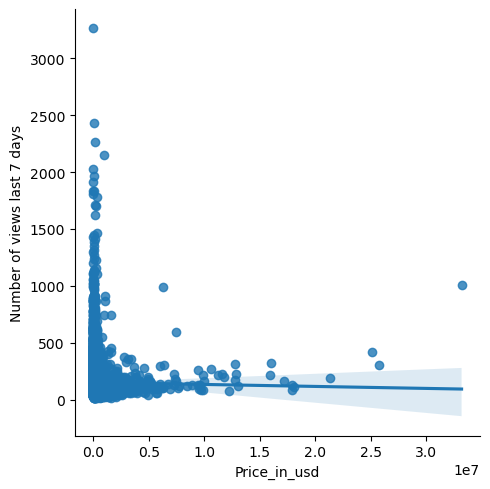

In [32]:
# Create a scatterplot for the "Price_in_usd" and "Number of views last 7 days" columns in seaborn with a negative correlation

sns.lmplot(x = 'Price_in_usd', y = 'Number of views last 7 days', data = df)

#### The line is straight, but the relationshipn between two variables are negative

### Investigating outliers in Price column

In [33]:
df['Price_in_usd'].describe()

count    9.590000e+03
mean     3.053603e+05
std      1.006332e+06
min      3.472000e+03
25%      4.505366e+04
50%      9.630000e+04
75%      2.557300e+05
max      3.317000e+07
Name: Price_in_usd, dtype: float64

In [34]:
df['Price_in_usd'].max()

33170000.000000004

In [35]:
df['Price_in_usd'].min()

3472.0000000000005

<Axes: >

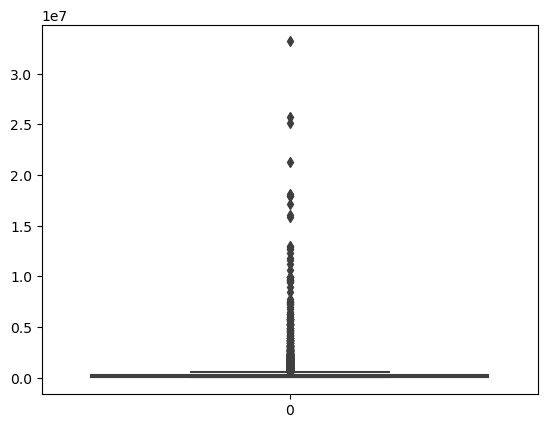

In [36]:
sns.boxplot(df['Price_in_usd'])

### task5 - Create a pair plot of the entire data set

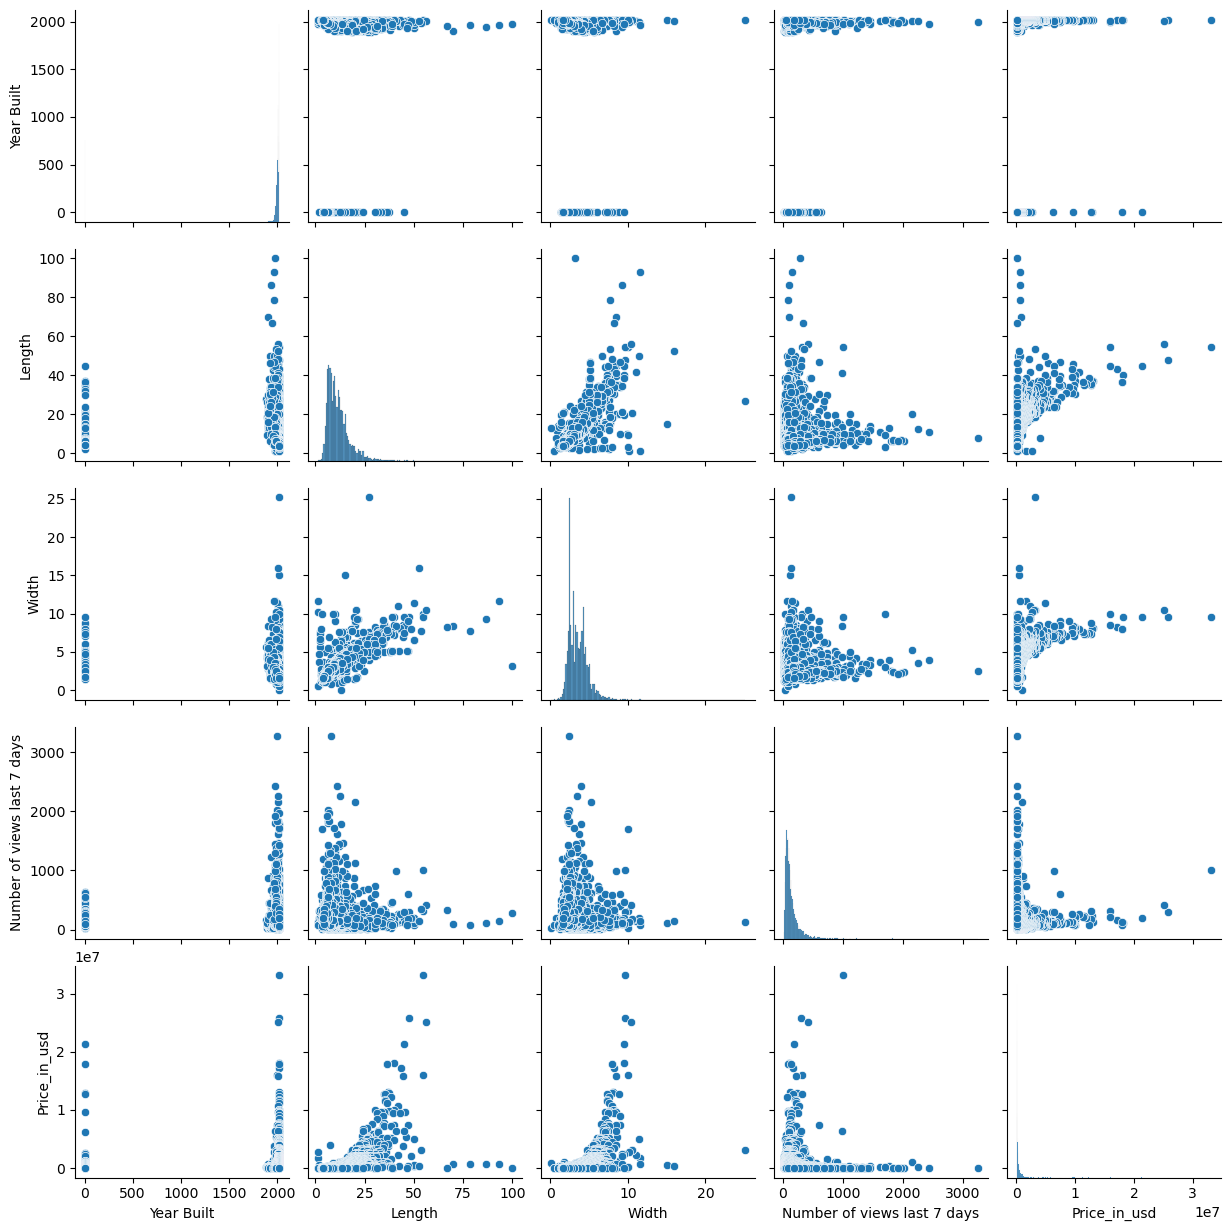

In [37]:
pair_plot = sns.pairplot(df)

#### I can see the positive relationship between price and year built in this vis, I will explore this relationship further to prove or deny the hypothesis. I would also explore more the relationship between number of views and price, to see if customers look at the boat more often before buying. 

### task6 - create a categorical plot and interpret the results.

<Axes: xlabel='Price_in_usd', ylabel='Count'>

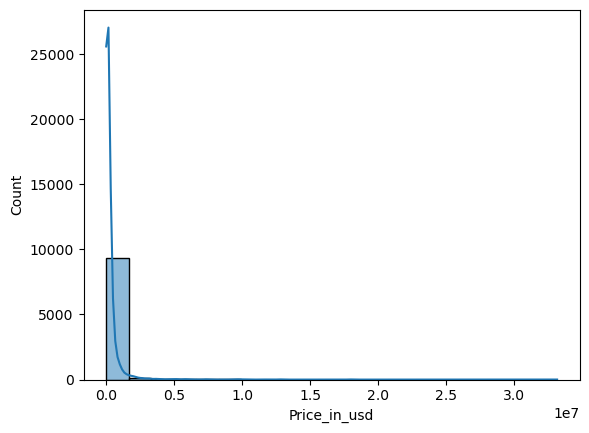

In [38]:
# creating categorical plot for price_in_usd column
sns.histplot(df['Price_in_usd'], bins = 20, kde = True)

In [40]:
# finding out what is the IQR of column price
display(df['Price_in_usd'].quantile([0.25, 0.50, 0.75]))
df['Price_in_usd'].max()

0.25     45053.6625
0.50     96300.0000
0.75    255730.0000
Name: Price_in_usd, dtype: float64

33170000.000000004

In [45]:
# grouping prices to have flag for lower, median and higher priced to use later for analysis
df.loc[df['Price_in_usd'] < 40000, 'Price_category'] = 'Low price'
df.loc[(df['Price_in_usd'] >= 40000) & (df['Price_in_usd'] < 250000), 'Price_category'] = 'Middle price'
df.loc[df['Price_in_usd'] >= 250000, 'Price_category'] = 'High price'

In [46]:
# using Price_category for categorical plot
df['Price_category'].value_counts(dropna = False)

Middle price    5109
High price      2450
Low price       2031
NaN              298
Name: Price_category, dtype: int64

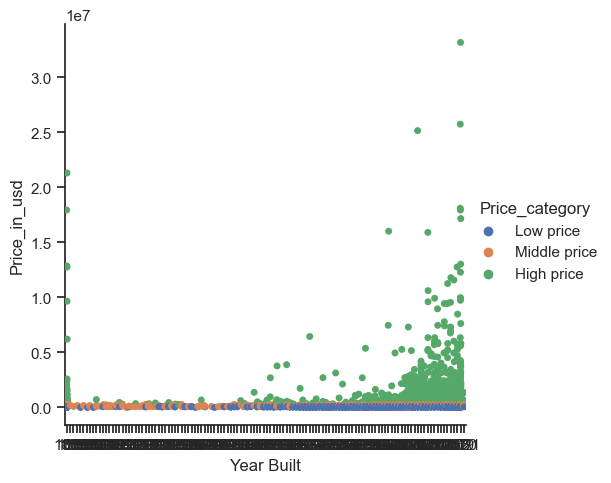

In [47]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x='Year Built', y='Price_in_usd', hue='Price_category', data=df)

In [48]:
df['Year Built'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9888 entries, 0 to 9887
Series name: Year Built
Non-Null Count  Dtype
--------------  -----
9888 non-null   int64
dtypes: int64(1)
memory usage: 77.4 KB


In [49]:
# finding out what is the IQR of year
display(df['Year Built'].quantile([0.25, 0.50, 0.75]))
df['Year Built'].max()

0.25    1996.0
0.50    2007.0
0.75    2017.0
Name: Year Built, dtype: float64

2021

In [50]:
# grouping years built to have flag for older, median and newer boats 
df.loc[(df['Year Built'] > 1950) & (df['Year Built'] < 2000), 'Boat Age']  = 'Very Old boat'
df.loc[(df['Year Built'] >= 2000) & (df['Year Built'] < 2017), 'Boat Age'] = 'Fine boat'
df.loc[df['Year Built'] >= 2017, 'Boat Age'] = 'New boat'

In [51]:
# checking value counts for boat age
df['Boat Age'].value_counts(dropna = False)

Fine boat        4296
New boat         2660
Very Old boat    2244
NaN               688
Name: Boat Age, dtype: int64

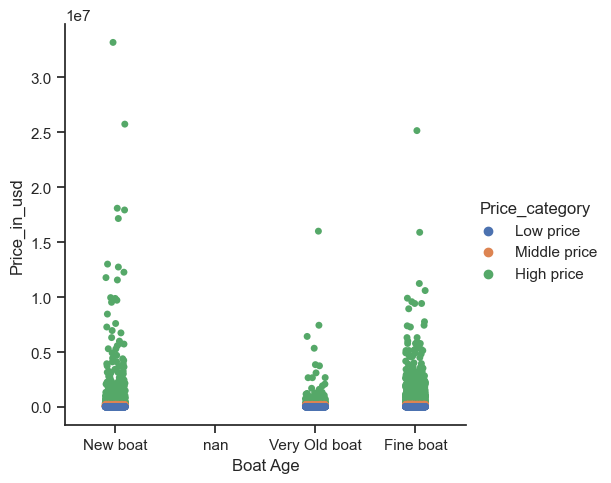

In [53]:
# Create a categorical plot in seaborn using the price categories and boat age created above
sns.set(style="ticks")
boat_price= sns.catplot(x='Boat Age', y='Price_in_usd', hue='Price_category', data=df)

#### Because there are too many entries i tried grouping boats by built year. There are outliers, but most of the boats are in new boat category with high price. The newer the boat the higher the price.  

In [54]:
# fig = g.get_figure()
boat_price.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat_plot_boat_price.png'))

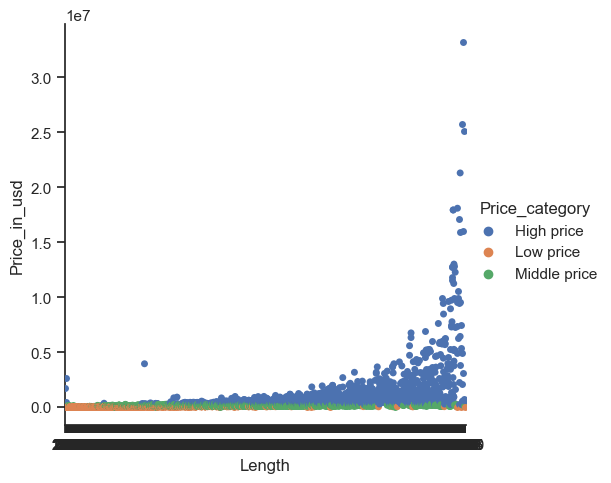

In [52]:
# categorical plot for length and prices
sns.set(style="ticks")
g = sns.catplot(x='Length', y='Price_in_usd', hue='Price_category', data=df)

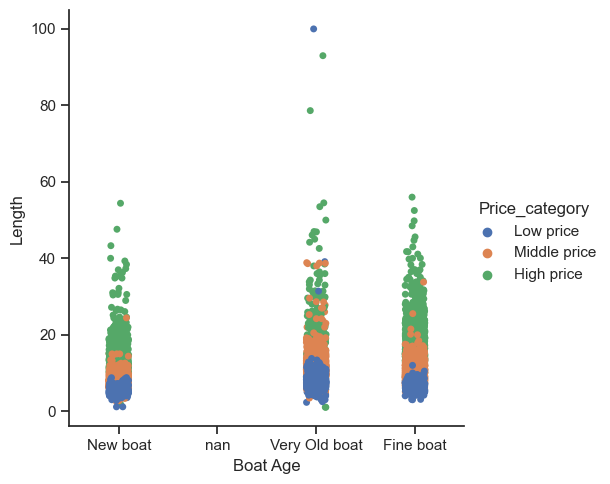

In [55]:
# Create a categorical plot in seaborn using the boat age and length created above
sns.set(style='ticks')
price_length= sns.catplot(x='Boat Age', y='Length', hue='Price_category', data=df)

In [56]:
# fig = g.get_figure()
price_length.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat_plot_price_length.png'))

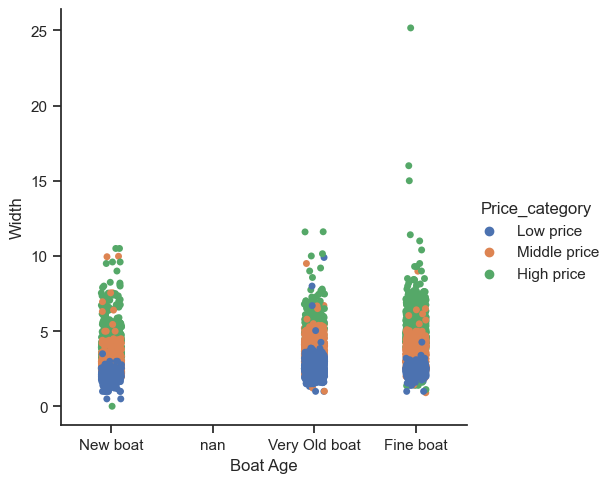

In [58]:
# Create a categorical plot in seaborn using the boat age and width created above
sns.set(style='ticks')
price_width= sns.catplot(x='Boat Age', y='Width', hue='Price_category', data=df)

In [59]:
# saving the png
price_width.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat_plot_price_width.png'))

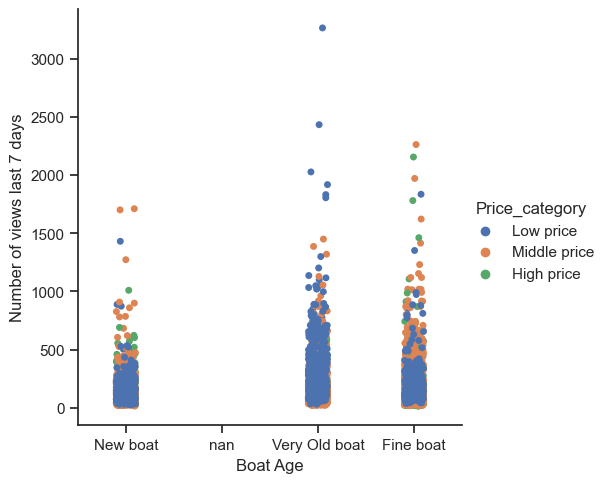

In [60]:
# Create a categorical plot in seaborn using the views and price
sns.set(style='ticks')
views_price= sns.catplot(x='Boat Age', y='Number of views last 7 days', hue='Price_category', data=df)

In [61]:
# saving the png
views_price.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cat_plot_views_price.png'))

### task7 - questions

#### 1. Is it the most expensive boats that get the most views?
#### There is a correlation showing one dot of high priced boat having more than 2000  views. But very old boat with low price gets the most views.
#### 2. Are newer boats are higher priced?
#### I want to say that newer boats are higher in price, but i am going to dig deeper. Because i have a hypothesis.

#### The rest of questions need another types of analysis.


### task8 - Hypothesis

#### 1. If the boat is new than price is higher.
#### 2. If there is a water (location) than price of boat is higher.
#### 3. Price depends on the manufacturer and engine.


In [ ]:
#Exporting to csv
df_listings.to_csv(os.path.join(path, '02 Data','Prepared Data', 'listings_flags.csv'))